In [1]:
import pandas as pd
import numpy as np 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
df = pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Survived','Fare'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [8]:
X

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [9]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.head(3)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000


In [12]:
clf = DecisionTreeClassifier()

In [13]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [14]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [15]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6317097026604068

In [16]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [17]:
trf1 = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [18]:
X_train_trf = trf1.fit_transform(X_train)
X_test_trf = trf1.transform(X_test)

In [19]:
trf1.named_transformers_['first'].n_bins_

array([15])

In [20]:
trf1.named_transformers_['first'].bin_edges_[0]

array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
       32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])

In [21]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,-1]
})

In [22]:
output.head()

,age,age_trf,fare,fare_trf
328,31.0,8.0,20.5250,8.0
73,26.0,6.0,14.4542,7.0
253,30.0,8.0,16.1000,7.0
719,33.0,9.0,7.7750,2.0
666,25.0,6.0,13.0000,6.0


In [23]:
output['age-labels'] = pd.cut(x=X_train['Age'],bins=trf1.named_transformers_['first'].bin_edges_[0].tolist())
output['fare-labels'] = pd.cut(x=X_train['Age'],bins=trf1.named_transformers_['second'].bin_edges_[0].tolist())

In [24]:
output.sample(5)

,age,age_trf,fare,fare_trf,age-labels,fare-labels
806,39.0,11.0,0.000,0.0,"(38.0, 42.0]","(31.275, 51.479]"
215,31.0,8.0,113.275,14.0,"(30.0, 32.0]","(26.55, 31.275]"
157,30.0,8.0,8.050,3.0,"(28.0, 30.0]","(26.55, 31.275]"
41,27.0,6.0,21.000,8.0,"(25.0, 28.0]","(26.55, 31.275]"
394,24.0,5.0,16.700,7.0,"(23.0, 25.0]","(18.75, 26.0]"


In [25]:
clf = DecisionTreeClassifier()

In [26]:
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [27]:
X_trf = trf1.transform(X)

In [29]:
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6668231611893584

In [34]:
def descretizer(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf1 = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])])
    
    X_trf = trf1.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title('After')
    
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title('After')
    
    plt.show()
    
    

0.6655320813771518


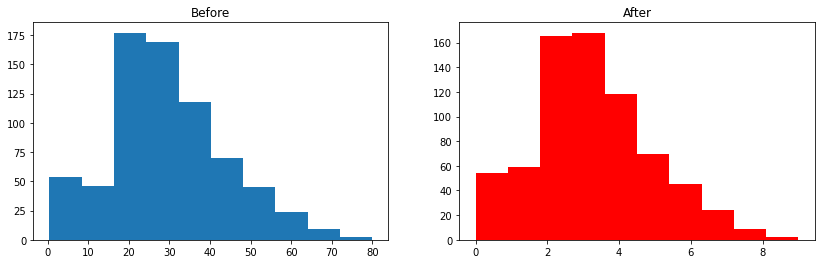

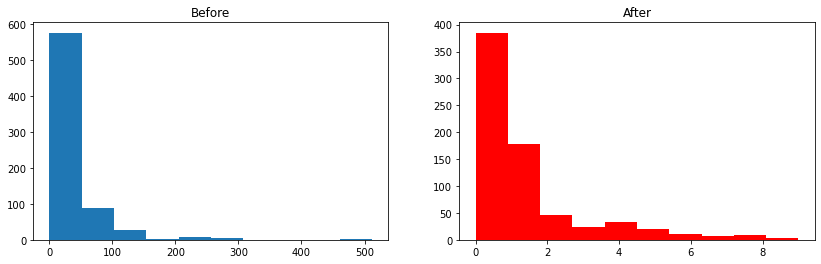

In [37]:
descretizer(10,'kmeans')